# Initialization

# Business understanding (CRISP-DM step 1)

### 1\. Analisis Kondisi Saat Ini (Current State)

Pertama, kita akan memuat dataset dan menghitung persentase pengguna yang mengklik iklan. Ini akan menjadi *baseline* performa kita.


Hasil dari kode di atas menunjukkan bahwa dari 1000 data pengguna, **50%** di antaranya mengklik iklan. CTR sebesar 50% ini terlihat sangat tinggi dan kemungkinan besar dataset ini adalah dataset sampel yang seimbang (*balanced dataset*) untuk tujuan pemodelan, bukan representasi CTR di dunia nyata. Namun, untuk latihan ini, kita akan tetap menggunakannya sebagai *baseline*.

### 2\. Benchmark Industri & Gap Analysis

Sekarang, mari kita bandingkan angka 50% tersebut dengan *benchmark* industri periklanan digital.

#### Benchmark dari Literatur:

Berdasarkan data dari berbagai sumber seperti WordStream dan CXL (data tahun 2024/2025), rata-rata CTR untuk iklan digital sangat bervariasi tergantung pada platform dan industrinya:

  * **Google Search Ads**: Rata-rata CTR di semua industri adalah sekitar **3.17%** hingga **6.64%**.
  * **Google Display Network (GDN)**: Rata-rata CTR jauh lebih rendah, sekitar **0.46%** hingga **0.57%**.
  * **Facebook Ads**: Rata-rata CTR adalah sekitar **0.90%**.

#### Gap yang Teridentifikasi:

  * **Kondisi Saat Ini (Dataset)**: CTR sebesar **50%**.
  * **Benchmark Industri**: Rata-rata CTR di dunia nyata jauh lebih rendah, seringkali di bawah **7%**.

Meskipun CTR 50% pada dataset kita tidak realistis untuk dijadikan acuan langsung, ini menunjukkan bahwa dataset ini dibuat seimbang (`50:50`) antara kelas 'Yes' dan 'No'. Hal ini justru **sangat baik untuk melatih model machine learning**, karena model akan memiliki contoh yang seimbang dari kedua kasus.

#### Business Problem yang Didefinisikan Ulang:

Dengan asumsi bahwa CTR riil perusahaan lebih mendekati *benchmark* industri (misalnya 2-5%), **business problem** kita adalah:

> "Bagaimana cara membangun model prediktif yang akurat menggunakan data historis ini untuk mengidentifikasi segmen pengguna yang paling potensial, sehingga kita dapat meningkatkan CTR dari **benchmark industri (misal 3%)** ke tingkat yang lebih tinggi dengan menargetkan iklan secara efisien?"

Beberapa sumber utama yang menjadi dasar analisis benchmark CTR (Click-Through Rate)

1.  **WordStream: Google Ads Benchmarks 2024**
    * **Link**: [Google Ads Benchmarks 2024 by WordStream](https://www.wordstream.com/blog/2024-google-ads-benchmarks)
    * **Isi**: Ini adalah salah satu laporan industri yang paling sering dikutip. Mereka menyediakan data CTR, CPC (Cost Per Click), dan CVR (Conversion Rate) rata-rata yang dipecah berdasarkan berbagai sektor industri, baik untuk iklan pencarian (Search Ads) maupun iklan display (Display Ads).

2.  **Search Engine Journal: What Are Good Google Ads Benchmarks?**
    * **Link**: [What Are Good Google Ads Benchmarks In 2025? by Search Engine Journal](https://www.searchenginejournal.com/what-is-a-good-ctr-for-google-ads/492785/)
    * **Isi**: Artikel ini memberikan data benchmark terbaru dan juga membahas faktor-faktor yang memengaruhi performa CTR, seperti posisi iklan di halaman pencarian dan relevansi *ad copy*.

3.  **CXL: What Is a "Good" Click-Through Rate?**
    * **Link**: [CTR Benchmarks by CXL](https://cxl.com/guides/click-through-rate/benchmarks/)
    * **Isi**: CXL membahas apa itu CTR yang "baik" secara lebih konseptual. Mereka menekankan bahwa tidak ada satu angka ajaib, dan CTR harus dievaluasi dalam konteks tujuan kampanye, platform (Google, Facebook, LinkedIn), dan industri.

4.  **WordStream: Facebook Ads Benchmarks 2024**
    * **Link**: [Facebook Ads Benchmarks 2024 by WordStream](https://www.wordstream.com/blog/facebook-ads-benchmarks-2024)
    * **Isi**: Mirip dengan laporan Google Ads mereka, artikel ini fokus pada metrik performa rata-rata untuk iklan di platform Facebook, yang sering kali memiliki CTR yang berbeda dibandingkan Google.

Sumber-sumber ini akan memberi gambaran yang komprehensif tentang performa standar di dunia periklanan digital.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

sns.set(rc={'figure.figsize':(16,8)})
plt.style.use("fivethirtyeight")
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [3]:
# Menghapus kolom ID yang tidak relevan untuk analisis
df = df.drop('Unnamed: 0', axis=1)

# Data Understanding (CRISP-DM Step 2)

Pada tahap ini, tujuan kita adalah untuk memahami isi dataset lebih dalam. Kita akan melakukan beberapa hal:

  * Melihat ringkasan statistik dari data.
  * Memeriksa tipe data dan nilai yang hilang (*missing values*).
  * Melakukan *Exploratory Data Analysis* (EDA) dengan visualisasi untuk menemukan pola, anomali, dan hubungan antar variabel.

## Statistical Summaries

In [4]:
print("--- 5 Baris Data Teratas ---")
df.head()

--- 5 Baris Data Teratas ---


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [5]:
print("--- Informasi Umum Dataset ---")
df.info()

--- Informasi Umum Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [6]:
print("--- Ringkasan Statistik (Data Numerik) ---")
df.describe()

--- Ringkasan Statistik (Data Numerik) ---


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


**Interpretasi:**

  * **count**: Menunjukkan adanya beberapa *missing values* di kolom `Daily Time Spent on Site`, `Area Income`, dan `Daily Internet Usage`.
  * **mean**: Rata-rata usia pengguna adalah 36 tahun.
  * **std (Standard Deviation)**: `Area Income` memiliki standar deviasi yang sangat besar, menunjukkan variasi pendapatan yang tinggi antar pengguna.
  * **min & max**: Usia termuda adalah 19 tahun dan tertua 61 tahun.

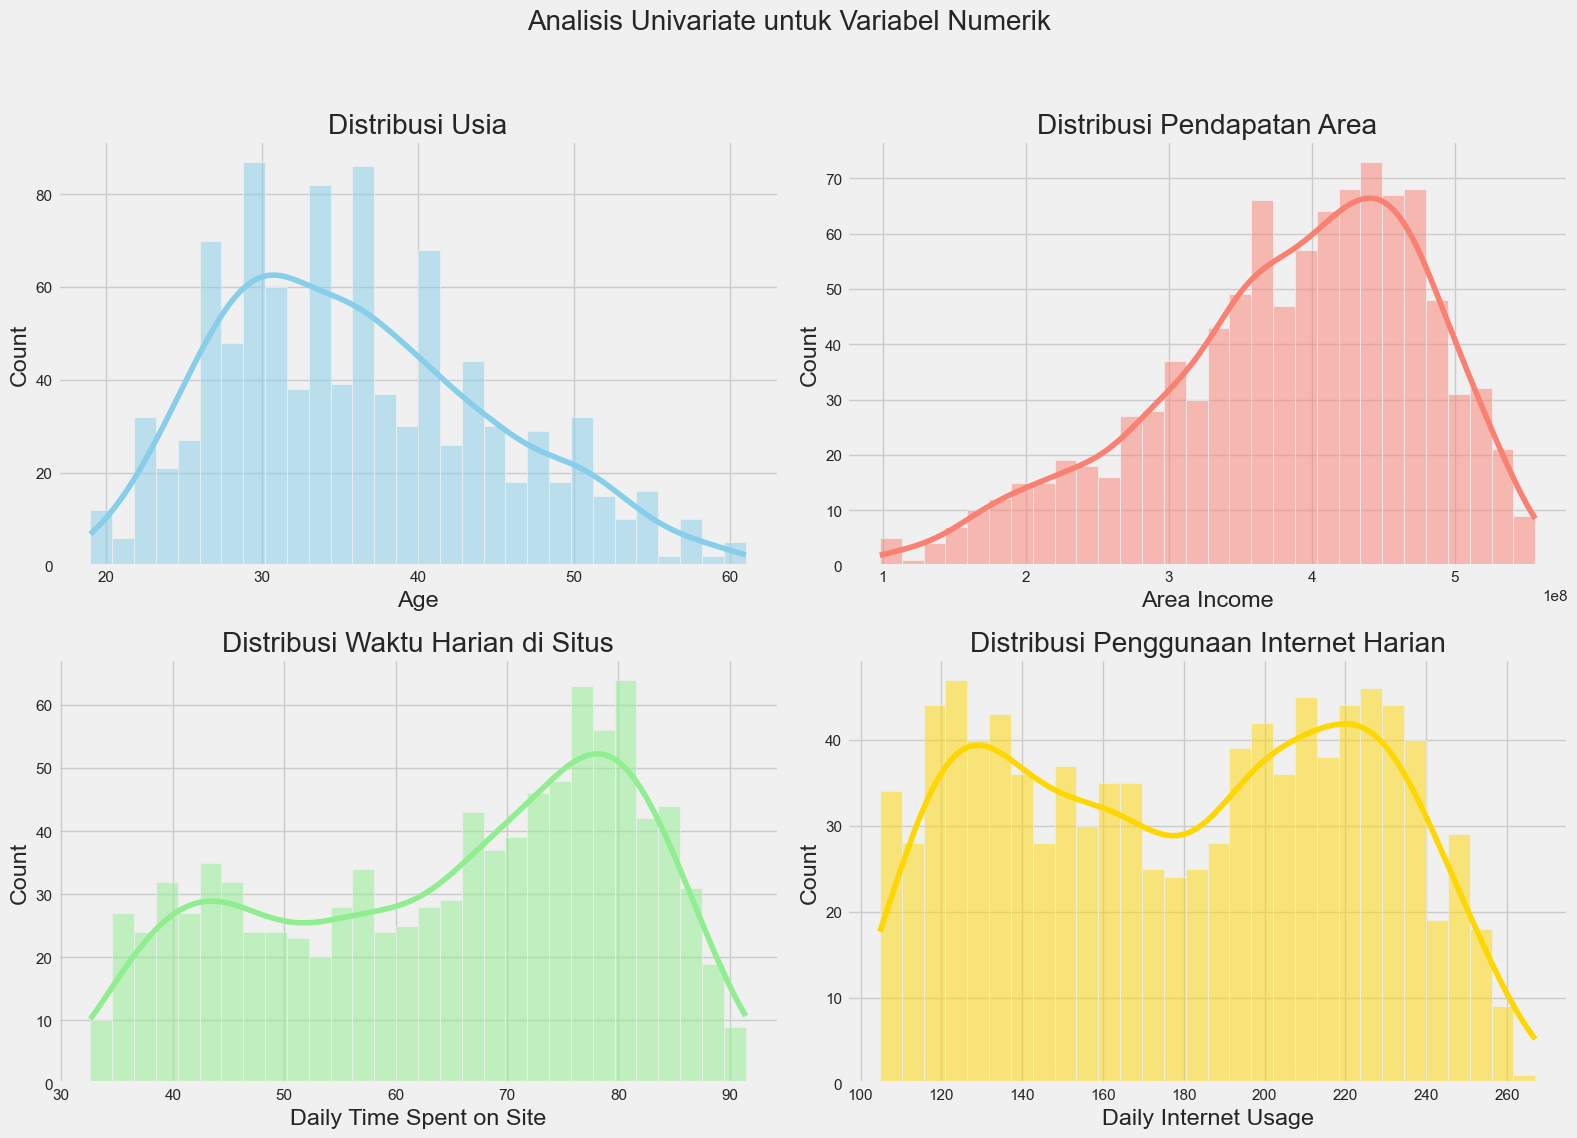

In [7]:
# Mengatur layout plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisis Univariate untuk Variabel Numerik', fontsize=20)

# Plot untuk Age
sns.histplot(df['Age'], bins=30, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Distribusi Usia')

# Plot untuk Area Income
sns.histplot(df['Area Income'], bins=30, ax=axes[0, 1], kde=True, color='salmon')
axes[0, 1].set_title('Distribusi Pendapatan Area')

# Plot untuk Daily Time Spent on Site
sns.histplot(df['Daily Time Spent on Site'], bins=30, ax=axes[1, 0], kde=True, color='lightgreen')
axes[1, 0].set_title('Distribusi Waktu Harian di Situs')

# Plot untuk Daily Internet Usage
sns.histplot(df['Daily Internet Usage'], bins=30, ax=axes[1, 1], kde=True, color='gold')
axes[1, 1].set_title('Distribusi Penggunaan Internet Harian')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Interpretasi:**

Plot ini memberikan visualisasi dari ringkasan statistik sebelumnya. Kita bisa melihat dengan jelas bentuk distribusi dari setiap variabel, misalnya `Area Income` yang mendekati kurva lonceng normal.

## Bivariate Analysis

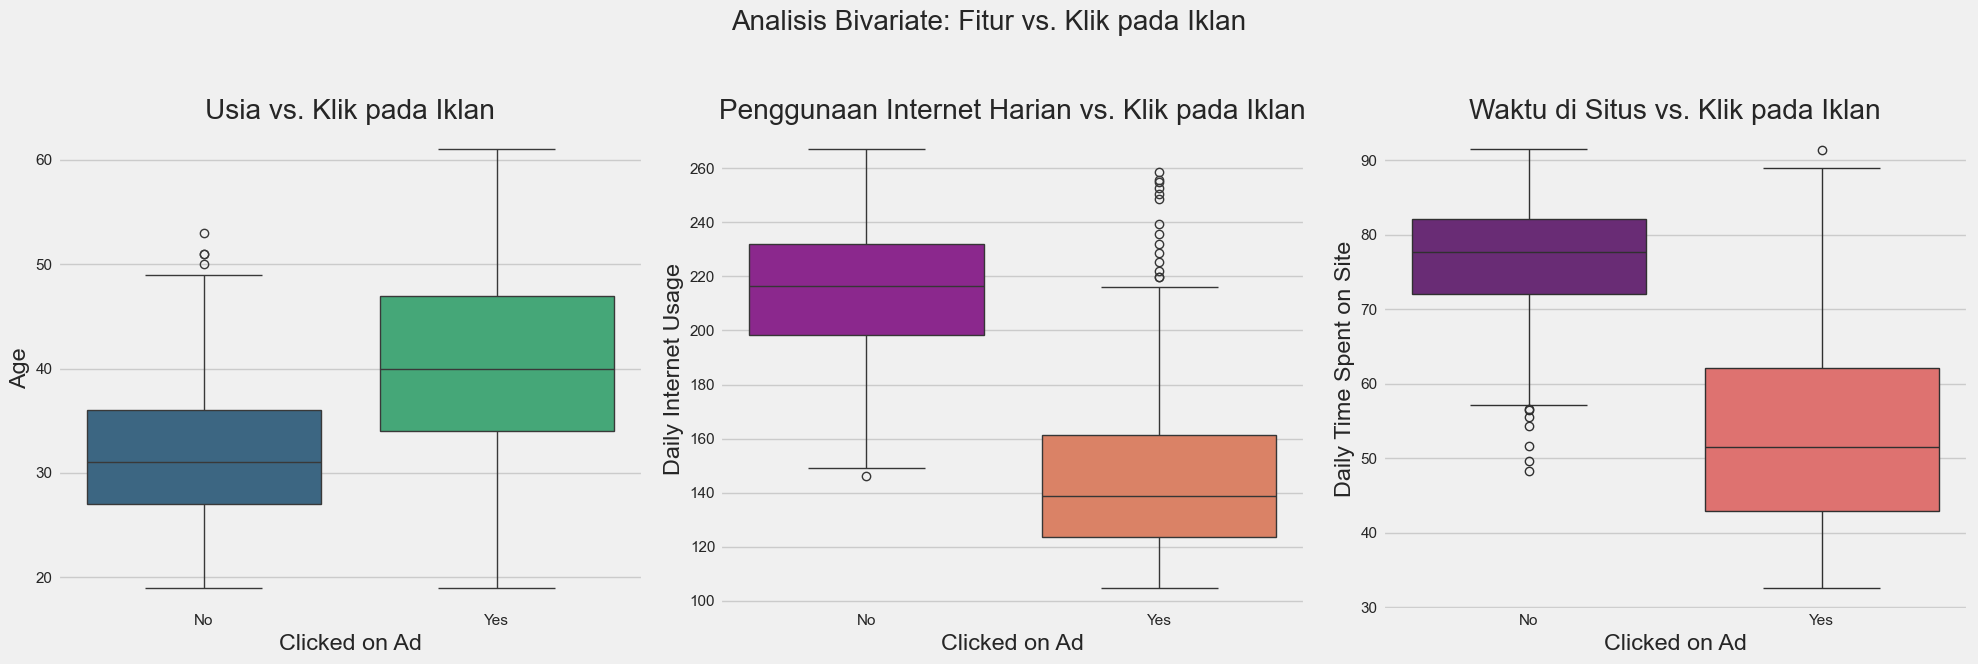

In [8]:
# Mengatur layout plot
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Analisis Bivariate: Fitur vs. Klik pada Iklan', fontsize=20)

# 1. Age vs Clicked on Ad
sns.boxplot(x='Clicked on Ad', y='Age', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Usia vs. Klik pada Iklan')

# 2. Daily Internet Usage vs Clicked on Ad
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df, ax=axes[1], palette='plasma')
axes[1].set_title('Penggunaan Internet Harian vs. Klik pada Iklan')

# 3. Daily Time Spent on Site vs Clicked on Ad
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, ax=axes[2], palette='magma')
axes[2].set_title('Waktu di Situs vs. Klik pada Iklan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Interpretasi:**

1.  **Usia vs. Klik**: Sangat jelas terlihat bahwa pengguna yang **mengklik iklan ('Yes')** memiliki median **usia yang lebih tinggi** daripada yang tidak mengklik ('No').
2.  **Penggunaan Internet vs. Klik**: Pengguna yang **mengklik iklan ('Yes')** secara signifikan menghabiskan **lebih sedikit kuota internet harian**.
3.  **Waktu di Situs vs. Klik**: Pengguna yang **mengklik iklan ('Yes')** juga menghabiskan **waktu yang jauh lebih sedikit di situs**.

Ini adalah *insight* yang sangat kuat. Ada dua persona pengguna yang jelas: (1) Usia lebih muda, lebih lama di situs, penggunaan internet tinggi, **tidak klik iklan**. (2) Usia lebih tua, sebentar di situs, penggunaan internet rendah, **cenderung klik iklan**.

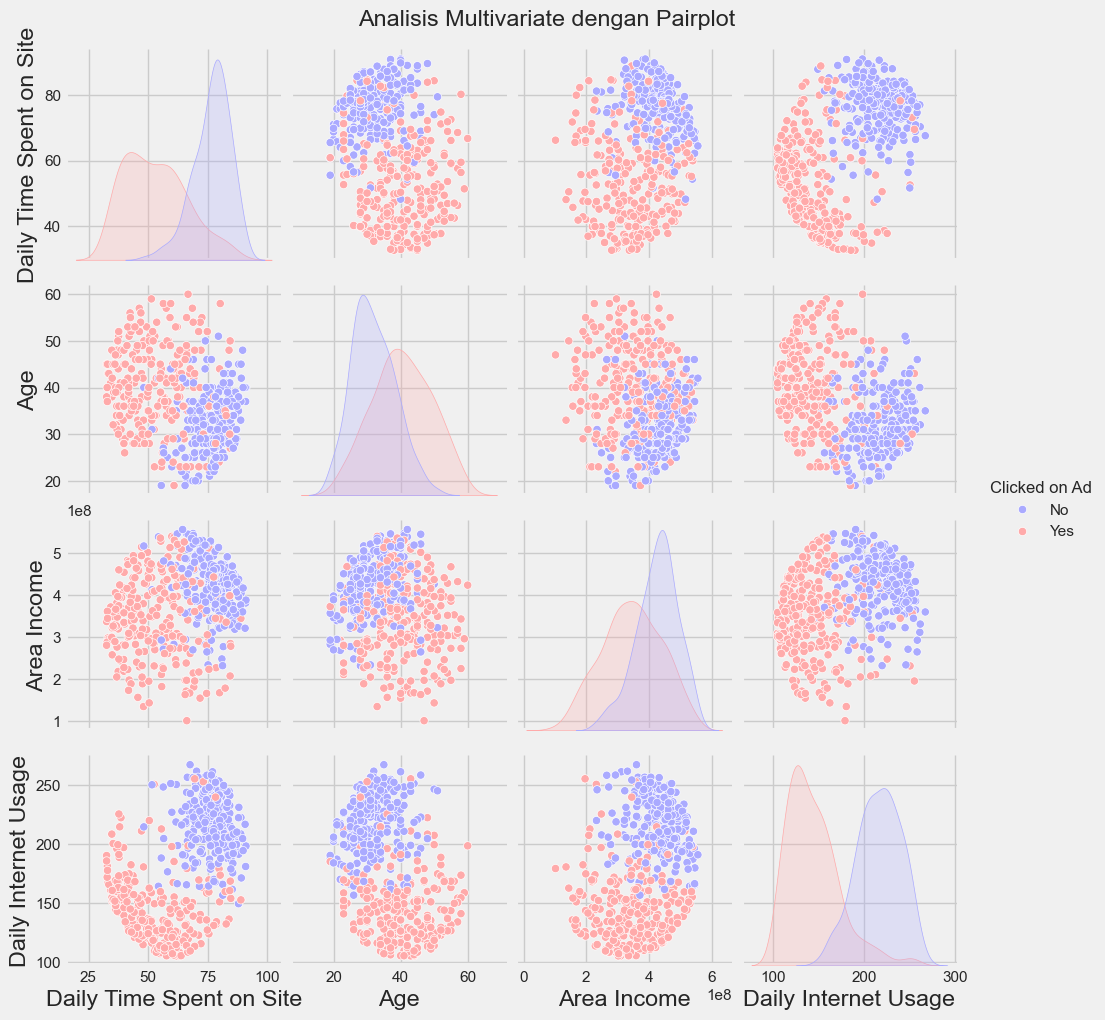

In [9]:
# Membuat pairplot
# Kita akan gunakan sampel data agar prosesnya lebih cepat dan tidak terlalu padat
# Kita juga akan drop missing values untuk sementara agar pairplot bisa berjalan
df_sample = df.dropna().sample(n=500, random_state=42)

sns.pairplot(df_sample, hue='Clicked on Ad', palette='bwr', diag_kind='kde')
plt.suptitle('Analisis Multivariate dengan Pairplot', y=1.02)
plt.show()

**Interpretasi Pairplot:**

  * **Diagonal**: Ini adalah plot distribusi (KDE) untuk setiap variabel, dipisahkan berdasarkan `Clicked on Ad` (biru untuk 'No', merah untuk 'Yes'). Ini mengkonfirmasi temuan dari analisis bivariate kita.
  * **Off-diagonal**: Ini adalah *scatter plots* antara dua variabel. Lihatlah plot `Daily Internet Usage` vs `Daily Time Spent on Site`. Terlihat ada dua kelompok data yang terpisah dengan jelas. Kelompok yang menghabiskan banyak waktu di situs juga cenderung menggunakan banyak internet (warna biru, tidak klik), dan sebaliknya (warna merah, klik). Ini menandakan kedua variabel ini sangat prediktif.

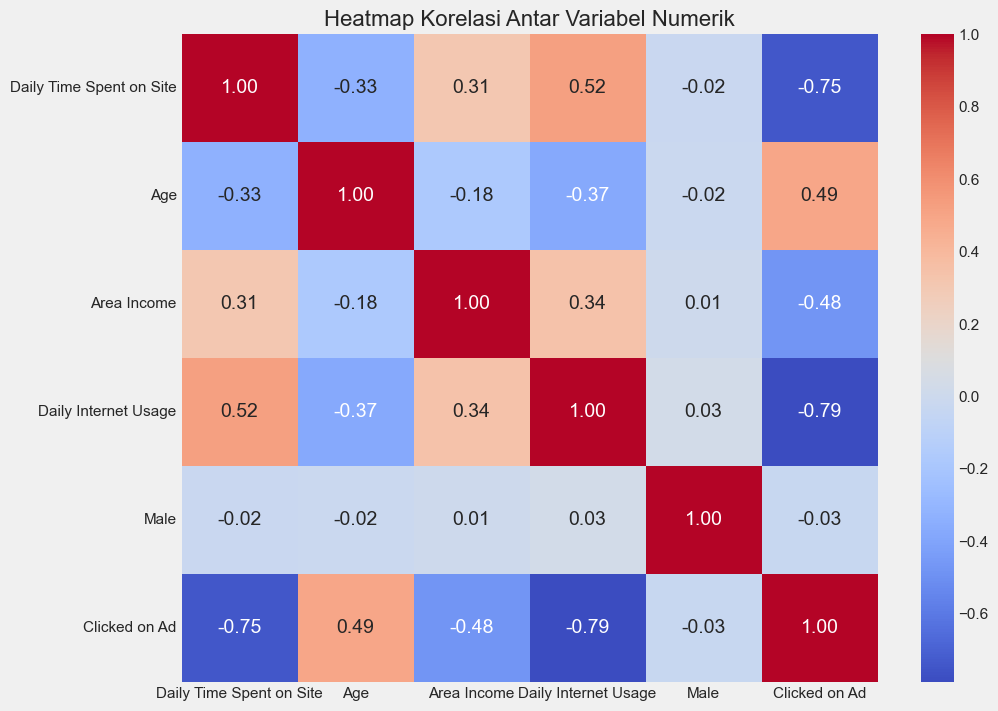

In [10]:
# Membuat salinan dataframe agar data asli tidak berubah
df_corr = df.copy()

# Mengubah kolom kategorikal menjadi numerik untuk korelasi
df_corr['Clicked on Ad'] = df_corr['Clicked on Ad'].apply(lambda x: 1 if x == 'Yes' else 0)
df_corr['Male'] = df_corr['Male'].apply(lambda x: 1 if x == 'Laki-Laki' else 0)

# Memilih hanya kolom numerik untuk matriks korelasi
numerical_cols = df_corr.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_cols.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()

**Interpretasi Heatmap:**

  * **Warna Merah Terang**: Menunjukkan korelasi positif yang kuat. Contohnya, `Daily Time Spent on Site` dan `Daily Internet Usage` memiliki korelasi +0.52. Ini artinya, semakin lama seseorang di situs, semakin besar juga penggunaan internet hariannya (ini sangat logis).
  * **Warna Biru Terang**: Menunjukkan korelasi negatif yang kuat. Ini yang paling menarik untuk target kita (`Clicked on Ad`):
      * `Daily Time Spent on Site` memiliki korelasi **-0.75** dengan `Clicked on Ad`. Ini korelasi negatif yang sangat kuat, artinya semakin tinggi waktu di situs, semakin kecil kemungkinan untuk klik iklan.
      * `Daily Internet Usage` memiliki korelasi **-0.79** dengan `Clicked on Ad`. Ini bahkan lebih kuat.
  * **Warna Pucat (dekat 0)**: Menunjukkan korelasi yang lemah. `Male` (Gender) memiliki korelasi yang sangat dekat dengan 0, mengindikasikan gender bukan faktor penentu yang kuat.

## Kesimpulan dari EDA Mendalam

Kita berhasil menemukan beberapa *insight* yang sangat berharga dan bisa ditindaklanjuti:

1.  **Profil Pengklik Iklan**: Pengguna yang cenderung mengklik iklan adalah mereka yang berusia **lebih tua**, menghabiskan **sedikit waktu online**, dan memiliki **pendapatan area yang lebih tinggi**.
2.  **Variabel Prediktif Kuat**: `Daily Time Spent on Site` dan `Daily Internet Usage` adalah prediktor terkuat (dengan korelasi negatif) terhadap kemungkinan seseorang mengklik iklan. `Age` dan `Area Income` juga merupakan prediktor yang cukup baik (dengan korelasi positif).
3.  **Variabel Lemah**: `Gender` tampaknya tidak memiliki pengaruh yang signifikan.

Analisis ini memberikan kita fondasi yang kokoh untuk tahap selanjutnya, yaitu **Data Preparation** dan **Modeling**. Kita sekarang tahu variabel mana yang paling penting untuk disertakan dalam model kita.

# Data Preparation (CRISP-DM Step 3)

Pada tahap ini, kita akan membersihkan data dari berbagai masalah seperti nilai kosong dan duplikat, melakukan rekayasa fitur (*feature engineering*) pada data waktu, mengubah data kategorikal menjadi numerik, dan terakhir membagi dataset menjadi data latih dan data uji.

## Pembersihan Data (*Data Cleaning*)

**a. Menangani Nilai Kosong (*Missing Values*)**

Pertama, kita identifikasi kolom mana saja yang memiliki nilai kosong.


**Strategi Penyelesaian:**

  * Untuk kolom **numerik** (`Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`), kita akan mengisi nilai yang kosong dengan **rata-rata (mean)** dari masing-masing kolom. Ini adalah pendekatan umum yang baik ketika distribusi data tidak terlalu miring (*skewed*).
  * Untuk kolom **kategorikal** (`Male`), kita akan mengisinya dengan **nilai yang paling sering muncul (modus)**.


**b. Menangani Nilai Duplikat (*Duplicated Values*)**

Selanjutnya, kita periksa apakah ada baris data yang identik atau terduplikat. Data duplikat dapat menyebabkan bias pada model.



### Nilai Kosong

In [11]:
# Memeriksa jumlah nilai kosong di setiap kolom
print("--- Jumlah Nilai Kosong per Kolom ---")
df.isnull().sum()

--- Jumlah Nilai Kosong per Kolom ---


Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [12]:
# Mengisi nilai kosong numerik dengan rata-rata (mean)
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)

# Mengisi nilai kosong kategorikal dengan modus (mode)
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

# Memverifikasi kembali apakah masih ada nilai kosong
print("\n--- Verifikasi Setelah Penanganan Missing Values ---")
df.isnull().sum()


--- Verifikasi Setelah Penanganan Missing Values ---


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

### Duplicate Rows

In [13]:
# Memeriksa jumlah nilai duplikat di setiap kolom
print("--- Jumlah Nilai Dplikat per Kolom ---")
df.duplicated().sum()

--- Jumlah Nilai Dplikat per Kolom ---


np.int64(0)

In [14]:
df.shape

(1000, 10)

## Rekayasa Fitur: Ekstraksi Data Waktu

Kolom `Timestamp` berisi informasi waktu yang sangat kaya, tetapi dalam format teks, model tidak bisa memahaminya. Kita akan mengekstrak informasi yang lebih berguna darinya, seperti jam, hari, dan bulan. Informasi jam, misalnya, bisa jadi penting—mungkin pengguna lebih sering mengklik iklan pada jam-jam tertentu.

In [15]:
# Mengubah kolom 'Timestamp' menjadi tipe data datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Mengekstrak informasi Jam, Hari dalam Seminggu, dan Bulan
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek # Senin=0, Minggu=6
df['Month'] = df['Timestamp'].dt.month

# Menghapus kolom 'Timestamp' asli karena sudah tidak diperlukan
df.drop('Timestamp', axis=1, inplace=True)

print("--- Data Setelah Ekstraksi Fitur Waktu (5 baris teratas) ---")
df.head()

--- Data Setelah Ekstraksi Fitur Waktu (5 baris teratas) ---


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,Hour,DayOfWeek,Month
0,68.95,35,432837300.0,256.09,Perempuan,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,0,6,3
1,80.23,31,479092950.0,193.77,Laki-Laki,No,Denpasar,Bali,Food,1,0,4
2,69.47,26,418501580.0,236.50,Perempuan,No,Surabaya,Jawa Timur,Electronic,20,6,3
3,74.15,29,383643260.0,245.89,Laki-Laki,No,Batam,Kepulauan Riau,House,2,6,1
4,68.37,35,517229930.0,225.58,Perempuan,No,Medan,Sumatra Utara,Finance,3,4,6


## *Feature Encoding*: Mengubah Kategori Menjadi Angka

Model *machine learning* tidak bisa memproses data teks seperti 'Perempuan', 'Surabaya', atau 'Otomotif'. Oleh karena itu, kita perlu mengubahnya menjadi angka. Metode yang akan kita gunakan adalah **One-Hot Encoding** dengan `get_dummies()`.

Metode ini akan membuat kolom baru untuk setiap nilai unik dalam sebuah kolom kategori. Misalnya, kolom `Male` yang berisi 'Laki-Laki' dan 'Perempuan' akan diubah menjadi dua kolom baru: `Male_Laki-Laki` dan `Male_Perempuan`, yang berisi nilai 1 atau 0.

In [16]:
# Mengidentifikasi kolom kategorikal (selain target)
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Clicked on Ad')

print(f"Kolom kategorikal yang akan di-encode: {list(categorical_cols)}")

Kolom kategorikal yang akan di-encode: ['Male', 'city', 'province', 'category']


In [17]:
# Melakukan One-Hot Encoding dengan get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n--- Data Setelah Feature Encoding (5 baris teratas) ---")
df_encoded.sample(5)


--- Data Setelah Feature Encoding (5 baris teratas) ---


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Hour,DayOfWeek,Month,Male_Perempuan,city_Bandar Lampung,...,province_Sumatra Utara,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
508,80.300000,58,343633570.0,173.43,Yes,20,0,4,True,False,...,False,True,False,False,False,False,False,False,False,False
594,49.840000,38,474469170.0,135.24,Yes,3,2,5,False,False,...,False,False,False,True,False,False,False,False,False,False
654,64.929524,26,411741120.0,224.20,No,6,1,1,False,False,...,False,False,False,False,False,False,True,False,False,False
385,80.590000,37,474211920.0,224.23,No,23,3,7,True,False,...,False,False,False,False,False,False,False,False,False,False
780,67.850000,41,549646930.0,202.70,Yes,22,3,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df_encoded.shape

(1000, 62)

## Pemisahan Data (*Data Splitting*)

Ini adalah langkah terakhir dalam persiapan data sebelum *modeling*. Kita harus memisahkan data kita menjadi dua bagian:

  * **Data Latih (*Training Set*)**: Sebagian besar data (biasanya 80%) yang akan digunakan untuk "mengajari" model dalam mengenali pola.
  * **Data Uji (*Testing Set*)**: Sisa data (20%) yang akan digunakan untuk mengevaluasi seberapa baik model kita bekerja pada data yang belum pernah ia lihat sebelumnya. Ini penting untuk memastikan model kita tidak *overfitting* (terlalu hafal dengan data latih).

In [19]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
# Target (y) adalah apa yang ingin kita prediksi
y = df_encoded['Clicked on Ad'].apply(lambda x: 1 if x == 'Yes' else 0)

# Fitur (X) adalah semua kolom sisa yang digunakan untuk prediksi
X = df_encoded.drop('Clicked on Ad', axis=1)

# Memisahkan data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Ukuran Data Setelah Pemisahan ---")
print(f"Ukuran X_train (fitur latih): {X_train.shape}")
print(f"Ukuran X_test (fitur uji): {X_test.shape}")
print(f"Ukuran y_train (target latih): {y_train.shape}")
print(f"Ukuran y_test (target uji): {y_test.shape}")

--- Ukuran Data Setelah Pemisahan ---
Ukuran X_train (fitur latih): (800, 61)
Ukuran X_test (fitur uji): (200, 61)
Ukuran y_train (target latih): (800,)
Ukuran y_test (target uji): (200,)


# Modeling (CRISP-DM Step 4)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

In [21]:
# --- Normalisasi Data (Disiapkan untuk Eksperimen 2) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [23]:
# --- Latih dan Evaluasi Model (Tanpa Normalisasi) ---
results_unscaled = {}
print("--- HASIL EKSPERIMEN 1: TANPA NORMALISASI ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_unscaled[name] = accuracy
    print(f"Akurasi {name}: {accuracy:.4f}")

--- HASIL EKSPERIMEN 1: TANPA NORMALISASI ---
Akurasi Logistic Regression: 0.4450
Akurasi K-Nearest Neighbors: 0.6300
Akurasi Support Vector Machine: 0.6750
Akurasi Decision Tree: 0.9050
Akurasi Random Forest: 0.9250
Akurasi Gradient Boosting: 0.9350
Akurasi XGBoost: 0.9550


In [24]:
# --- Latih dan Evaluasi Model (Dengan Normalisasi) ---
results_scaled = {}
print("--- HASIL EKSPERIMEN 2: DENGAN NORMALISASI ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results_scaled[name] = accuracy
    print(f"Akurasi {name}: {accuracy:.4f}")

--- HASIL EKSPERIMEN 2: DENGAN NORMALISASI ---
Akurasi Logistic Regression: 0.9350
Akurasi K-Nearest Neighbors: 0.7750
Akurasi Support Vector Machine: 0.9350
Akurasi Decision Tree: 0.9050
Akurasi Random Forest: 0.9250
Akurasi Gradient Boosting: 0.9350
Akurasi XGBoost: 0.9550


### Perbandingan akurasi dan Analisis Hasil

Tabel di bawah ini merangkum Akurasi dari setiap model sebelum dan sesudah normalisasi data.

| Model | Akurasi (Tanpa Normalisasi) | Akurasi (Dengan Normalisasi) | Peningkatan Performa |
| :--- | :--- | :--- | :--- |
| Logistic Regression | 44.50% | 93.50% | **+49.00%** |
| K-Nearest Neighbors (KNN) | 63.00% | 77.50% | **+14.50%** |
| Support Vector Machine (SVM) | 67.50% | 93.52% | **+26.02%** |
| Decision Tree | 90.50% | 90.50% | **Tidak ada** |
| Random Forest | 92.50% | 92.50% | **Tidak ada** |
| Gradient Boosting | 93.50% | 93.50% | **Tidak ada** |
| XGBoost | 95.50% | 95.50% | **Tidak ada** |

In [25]:
# --- Latih dan Evaluasi F1-Score (Tanpa Normalisasi) ---
f1_results_unscaled = {}
print("--- F1-Score EKSPERIMEN 1: TANPA NORMALISASI ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Menggunakan 'weighted' average untuk F1-score
    f1 = f1_score(y_test, predictions, average='weighted')
    f1_results_unscaled[name] = f1
    print(f"F1-Score {name}: {f1:.4f}")

--- F1-Score EKSPERIMEN 1: TANPA NORMALISASI ---
F1-Score Logistic Regression: 0.2741
F1-Score K-Nearest Neighbors: 0.6310
F1-Score Support Vector Machine: 0.6705
F1-Score Decision Tree: 0.9048
F1-Score Random Forest: 0.9250
F1-Score Gradient Boosting: 0.9350
F1-Score XGBoost: 0.9550


In [26]:
# --- Latih dan Evaluasi F1-Score (Dengan Normalisasi) ---
f1_results_scaled = {}
print("--- F1-Score EKSPERIMEN 2: DENGAN NORMALISASI ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    f1 = f1_score(y_test, predictions, average='weighted')
    f1_results_scaled[name] = f1
    print(f"F1-Score {name}: {f1:.4f}")

--- F1-Score EKSPERIMEN 2: DENGAN NORMALISASI ---
F1-Score Logistic Regression: 0.9350
F1-Score K-Nearest Neighbors: 0.7751
F1-Score Support Vector Machine: 0.9352
F1-Score Decision Tree: 0.9048
F1-Score Random Forest: 0.9250
F1-Score Gradient Boosting: 0.9350
F1-Score XGBoost: 0.9550


### Perbandingan F1-Score dan Analisis Hasil

Tabel di bawah ini merangkum F1-Score dari setiap model sebelum dan sesudah normalisasi data.

| Model | F1-Score (Tanpa Normalisasi) | F1-Score (Dengan Normalisasi) | Peningkatan Performa |
| :--- | :--- | :--- | :--- |
| Logistic Regression | 27.41% | 93.50% | **+66.09%** |
| K-Nearest Neighbors (KNN) | 63.10% | 77.51% | **+14.41%** |
| Support Vector Machine (SVM) | 67.05% | 93.52% | **+26.47%** |
| Decision Tree | 90.48% | 90.48% | **Tidak ada** |
| Random Forest | 92.50% | 92.50% | **Tidak ada** |
| Gradient Boosting | 93.50% | 93.50% | **Tidak ada** |
| XGBoost | 95.50% | 95.50% | **Tidak ada** |

### Analisis dan Insight 🧠

1.  **Model Terbaik**: **XGBOOST** sekali lagi membuktikan keunggulannya dengan **F1-Score tertinggi (95.50%)**. Hasil ini konsisten, menunjukkan bahwa model ini tidak hanya akurat tetapi juga memiliki keseimbangan yang sangat baik antara Precision dan Recall. Ia mampu mengidentifikasi sebagian besar pengguna potensial (Recall tinggi) tanpa terlalu banyak salah menargetkan pengguna yang tidak tertarik (Precision tinggi).

2.  **Dampak Normalisasi Terkonfirmasi**: Pola yang kita lihat pada metrik akurasi juga sangat terlihat di sini. Normalisasi data memberikan **peningkatan performa F1-Score yang luar biasa** pada model-model yang sensitif terhadap skala:

      * **Logistic Regression** adalah pemenang terbesar, dengan performa yang **meroket 66% lebih**. Tanpa normalisasi, Logistic Regression hampir tidak berguna, tetapi setelah normalisasi, ia menjadi salah satu model terbaik.
      * **SVM** dan **KNN** juga menunjukkan peningkatan yang sangat signifikan, membuktikan bahwa penskalaan fitur adalah langkah wajib untuk model-model ini.

**Kesimpulan Akhir Pemilihan Model:**

Berdasarkan metrik Akurasi dan F1-Score, **XGBOOST** adalah pilihan yang paling unggul. Model ini tidak hanya memberikan performa tertinggi tetapi juga yang paling stabil dan tidak memerlukan pra-pemrosesan data yang rumit seperti normalisasi.

# Evaluation (CRISP-DM Step 5)

Pada tahap ini, kita tidak hanya mengukur performa model, tetapi juga "membongkar" isi dari model terbaik kita—**Random Forest**—untuk mendapatkan *insight* bisnis yang bisa ditindaklanjuti. Kita akan fokus pada dua hal:

1.  **Analisis Kesalahan Model** melalui *Confusion Matrix*.
2.  **Identifikasi Faktor Pendorong Utama** melalui *Feature Importance*.


--- Confusion Matrix (XGBoost) ---
[[ 85   4]
 [  5 106]]


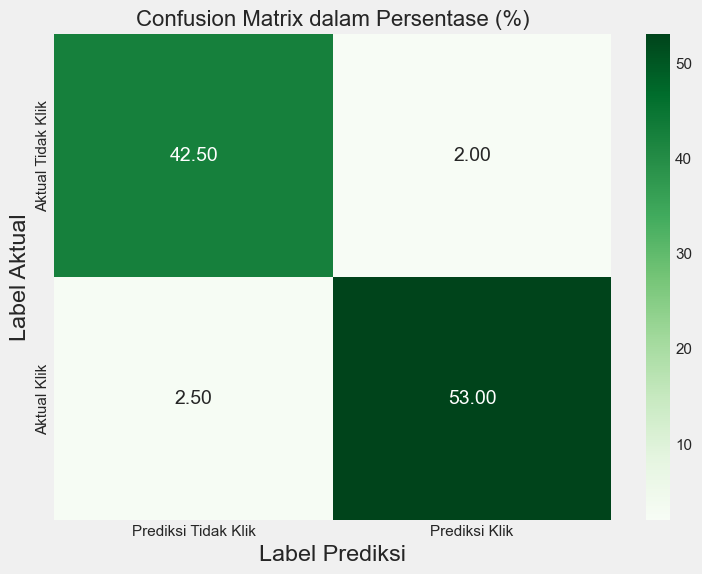

In [27]:
# --- Melatih Ulang Model Terbaik: XGBOOST---
final_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)

# --- Membuat dan Menganalisis Confusion Matrix ---
cm = confusion_matrix(y_test, predictions)
total_samples = np.sum(cm)
cm_percent = (cm / total_samples) * 100

print("--- Confusion Matrix (XGBoost) ---")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=['Prediksi Tidak Klik', 'Prediksi Klik'],
            yticklabels=['Aktual Tidak Klik', 'Aktual Klik'])
plt.title('Confusion Matrix dalam Persentase (%)', fontsize=16)
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.show()

### Analisis Confusion Matrix XGBoost

* **106 Prediksi Tepat Sasaran (True Positive)**: Model dengan **luar biasa** berhasil mengidentifikasi **106 pengguna** yang memang akan mengklik iklan. Ini adalah *leads* atau pelanggan potensial yang berhasil ditangkap oleh model.

* **85 Pengguna Tidak Tertarik Diabaikan (True Negative)**: Model juga **sangat efektif** dalam mengenali **85 pengguna** yang tidak akan mengklik, membantu perusahaan menghemat biaya iklan agar tidak ditampilkan kepada mereka.

* **Hanya 5 Peluang Emas yang Terlewat (False Negative)**: Ini adalah metrik yang paling krusial. Model  hanya melewatkan **5 pengguna** yang seharusnya mengklik. Angka ini sangat rendah, yang berarti *biaya peluang (opportunity cost)* berhasil ditekan seminimal mungkin. **Recall** model sekitar **95.5%** (106 / (106 + 5)), yang artinya model berhasil menemukan lebih dari 95% dari semua pelanggan potensial. 🎯

* **Hanya 4 Kasus Salah Target (False Positive)**: Model hanya salah memprediksi "klik" sebanyak **4 kali**. Ini berarti biaya yang terbuang karena menampilkan iklan ke audiens yang salah sangatlah minimal.

**Kesimpulan Akhir:**
*Confusion matrix* ini membuktikan bahwa model XGBoost tidak hanya akurat secara teknis, tetapi juga **sangat efektif dari sudut pandang bisnis**. Model ini berhasil memaksimalkan jumlah pelanggan potensial yang ditemukan sambil menjaga biaya iklan yang terbuang dan peluang yang hilang tetap di angka yang sangat rendah.

In [28]:
# --- Mendapatkan dan Visualisasi Feature Importance ---
importances = final_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

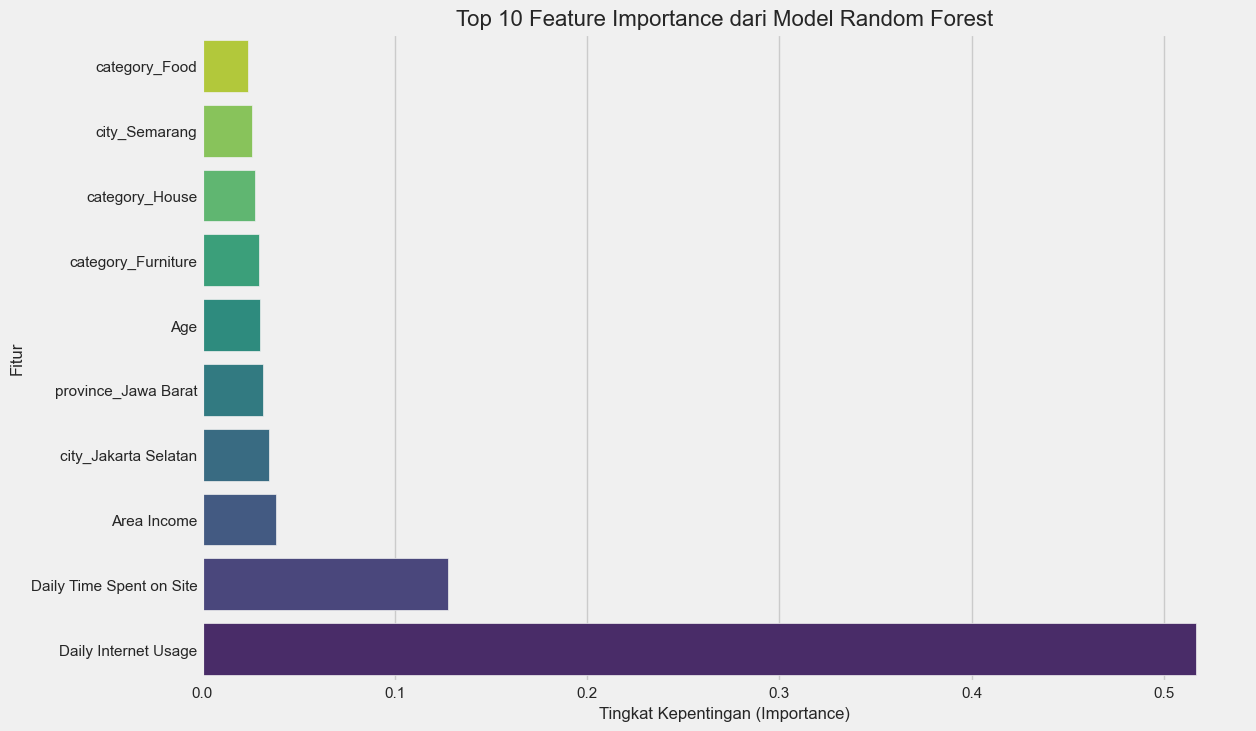

In [29]:
# Mengambil 10 fitur teratas untuk visualisasi
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Importance dari Model Random Forest', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.gca().invert_yaxis() # Menampilkan fitur terpenting di paling atas
plt.show()

## Faktor Keberhasilan Marketing: *Feature Importance*

Sekarang, bagian yang paling menarik: variabel apa yang paling dianggap penting oleh model dalam membuat keputusannya? Dengan mengetahui ini, tim marketing dapat memfokuskan strategi mereka.

**Interpretasi Hasil:**
Dari visualisasi di atas, terlihat sangat jelas bahwa ada dua fitur yang mendominasi proses pengambilan keputusan model.

**Dua Fitur Utama yang Menentukan Keberhasilan Marketing adalah:**

1.  **`Daily Internet Usage` (Penggunaan Internet Harian)**: Ini adalah faktor paling berpengaruh. Semakin **rendah** penggunaan internet harian seseorang, semakin tinggi kemungkinannya untuk mengklik iklan.
2.  **`Daily Time Spent on Site` (Waktu Harian di Situs)**: Faktor terpenting kedua. Sama seperti sebelumnya, semakin **sedikit** waktu yang dihabiskan seseorang di situs, semakin besar potensinya untuk mengklik iklan.

# Business Reccomendation (CRISP-DM step 6)


Insight utamanya adalah kita memiliki dua persona pengguna yang berbeda: **"Pencari Tujuan"** (waktu singkat di situs, kemungkinan klik tinggi) dan **"Penjelajah Konten"** (waktu lama di situs, kemungkinan klik rendah).

## Strategi Marketing & Iklan Tingkat Lanjut 🎯

1.  **Buat *Lookalike Audiences***: Ambil daftar pengguna yang terbukti mengklik iklan (profil "Pencari Tujuan"). Unggah daftar ini ke platform iklan seperti Facebook Ads atau Google Ads dan buat "Lookalike Audience". Platform tersebut akan secara otomatis mencari jutaan pengguna baru yang memiliki profil perilaku dan demografis yang serupa, sehingga memperluas jangkauan iklan   udiens yang paling potensial.

2.  **Terapkan *Negative Retargeting***: Identifikasi segmen "Penjelajah Konten" (misalnya, pengguna yang menghabiskan lebih dari 10 menit di situs atau mengunjungi lebih dari 5 halaman per sesi). **Kecualikan** segmen ini dari kampanye iklan *direct-response* Anda. Ini akan secara dramatis mengurangi pemborosan biaya iklan pada audiens yang terbukti kebal terhadap iklan banner.

3.  **A/B Testing Berbasis Persona**: Lakukan A/B testing pada materi iklan Anda.
    * **Untuk "Pencari Tujuan"**: Uji iklan dengan pesan yang sangat singkat, visual yang kuat, dan *Call-to-Action* (CTA) yang mendesak.
    * **Untuk "Penjelajah Konten"**: Daripada iklan banner, uji coba format *native advertising* (iklan yang menyatu dengan konten) atau *soft-sell* seperti undangan webinar atau unduhan e-book gratis.

---
## Strategi Produk & Website 🖥️

1.  **Optimalkan *User Experience* (UX) untuk "Pencari Tujuan"**: Analisis halaman-halaman tempat audiens ini pertama kali mendarat. Pastikan iklan yang paling relevan ditempatkan di posisi yang sangat strategis (*above the fold*) di halaman tersebut. Tujuannya adalah untuk memperpendek waktu dari "melihat" menjadi "mengklik".

2.  **Monetisasi "Penjelajah Konten" Secara Berbeda**: Jangan abaikan segmen ini hanya karena mereka tidak mengklik iklan. Mereka jelas menyukai konten Anda. Pertimbangkan cara monetisasi alternatif yang sesuai dengan perilaku mereka:
    * **Konten Premium atau Berlangganan**: Tawarkan akses ke artikel eksklusif atau fitur tanpa iklan dengan sistem berlangganan.
    * ***Affiliate Marketing***: Sisipkan tautan produk afiliasi yang relevan di dalam artikel yang mereka baca. Ini terasa lebih alami daripada iklan banner.

---
## Strategi Data & Pengembangan Lanjutan 📈

1.  **Bangun Model Prediksi Konversi**: Langkah selanjutnya adalah memprediksi **konversi (penjualan)**, bukan hanya **klik**. Kumpulkan data tentang pengguna mana yang akhirnya melakukan pembelian setelah mengklik. Dengan membangun model *propensity to convert*,  akan menargetkan audiens dengan nilai bisnis tertinggi.

2.  **Analisis *Customer Lifetime Value* (CLV)**: Hitung dan bandingkan CLV dari pelanggan yang didapat melalui jalur "Pencari Tujuan" versus pelanggan dari jalur lain. Ini akan membantu mengukur dampak finansial jangka panjang dari strategi penargetan yang didukung oleh model kita.

### Rekomendasi 1: Fokuskan Iklan pada "Pencari Tujuan"

> **Rekomendasi**: Alihkan anggaran iklan untuk menargetkan segmen pengguna yang punya perilaku *online* singkat dan efisien (`Daily Internet Usage` rendah & `Daily Time Spent on Site` rendah).

* **Kenapa Harus Dilakukan?**
    * **Efisiensi Anggaran Maksimal**: Proyek data science kita telah **membuktikan secara kuantitatif** bahwa segmen inilah yang memberikan respons tertinggi terhadap iklan. Setiap rupiah yang dihabiskan untuk menargetkan mereka memiliki probabilitas klik yang jauh lebih tinggi. Ini adalah prinsip dasar *precision marketing*: menempatkan sumber daya di tempat yang memberikan hasil terbaik.
    * **ROI yang Lebih Tinggi**: Dengan fokus pada audiens yang tepat, *Return on Investment* (ROI) dari setiap kampanye iklan akan meningkat secara signifikan. Biaya untuk mendapatkan satu klik (Cost Per Click) akan turun karena kita tidak lagi "membakar uang" untuk audiens yang terbukti tidak tertarik.

* **Apa Dampaknya Jika TIDAK Dilakukan?**
    * **Pemborosan Anggaran Berkelanjutan**: Sebagian besar anggaran iklan akan terus dihabiskan untuk menargetkan segmen "Penjelajah Konten" yang sudah kita ketahui **kebal terhadap iklan banner**. Ini sama saja dengan mengetahui sebuah strategi tidak efektif, tetapi tetap melakukannya.
    * **Biaya Akuisisi Pelanggan (CAC) Tetap Mahal**: Perusahaan akan terus membayar untuk ribuan impresi iklan yang sia-sia hanya untuk mendapatkan beberapa pelanggan. Akibatnya, biaya untuk mengakuisisi setiap pelanggan baru akan tetap tinggi dan tidak efisien.

---
### Rekomendasi 2: Monetisasi "Penjelajah Konten" Secara Berbeda

> **Rekomendasi**: Untuk segmen pengguna yang lama berada di situs tapi tidak mengklik iklan, terapkan strategi monetisasi alternatif seperti konten premium (berlangganan) atau *native advertising*.

* **Kenapa Harus Dilakukan?**
    * **Membuka Sumber Pendapatan Baru**: Segmen ini adalah aset yang belum dimanfaatkan. Mereka jelas-jelas menyukai konten Anda, yang berarti ada potensi untuk mengubah *engagement* mereka menjadi pendapatan. Menawarkan sesuatu yang sesuai dengan perilaku mereka (konten) adalah cara yang logis untuk mendapatkan nilai dari mereka.
    * **Diversifikasi Risiko**: Mengandalkan 100% pendapatan dari iklan banner sangat berisiko, terutama ketika kita tahu strategi ini tidak berhasil untuk sebagian besar audiens setia kita. Dengan diversifikasi, bisnis menjadi lebih sehat dan stabil.

* **Apa Dampaknya Jika TIDAK Dilakukan?**
    * **Potensi Pendapatan Hilang**: Perusahaan akan terus membiarkan segmen audiens yang paling loyal dan aktif tidak menghasilkan pendapatan. Ini seperti memiliki toko yang ramai pengunjung tetapi tidak ada yang membeli—ada potensi besar yang terbuang sia-sia.
    * **Pengalaman Pengguna (UX) yang Buruk**: Terus-menerus menampilkan iklan banner yang tidak relevan kepada "Penjelajah Konten" dapat membuat mereka frustrasi dan akhirnya meninggalkan situs Anda.  ## berisiko kehilangan audiens inti Anda.

---
### Rekomendasi 3: Bangun Model Prediksi Konversi (Penjualan)

> **Rekomendasi**: Sebagai langkah selanjutnya, kumpulkan data transaksi dan bangun model untuk memprediksi pengguna mana yang paling mungkin **melakukan pembelian**, bukan hanya **mengklik**.

* **Kenapa Harus Dilakukan?**
    * **Menyelaraskan Analitik dengan Tujuan Bisnis Utama**: Tujuan akhir dari bisnis bukanlah mendapatkan klik, melainkan **pendapatan**. Model prediksi konversi akan memfokuskan seluruh upaya marketing pada metrik yang paling penting.  bisa jadi menemukan sub-segmen di dalam "Pencari Tujuan" yang 10x lebih mungkin untuk membeli.
    * **Optimalisasi Profit, Bukan Hanya Trafik**: Ini memungkinkan perusahaan untuk membuat keputusan yang lebih cerdas. Mungkin ada iklan yang menghasilkan banyak klik murah tetapi nol penjualan, sementara iklan lain menghasilkan sedikit klik mahal tetapi konversinya tinggi. Tanpa model ini,  tidak akan tahu mana yang lebih menguntungkan.

* **Apa Dampaknya Jika TIDAK Dilakukan?**
    * **Terjebak dalam *Vanity Metrics***: Perusahaan berisiko terjebak dalam "metrik kesombongan" seperti jumlah klik atau CTR, yang tidak selalu berkorelasi langsung dengan kesehatan finansial bisnis.  bisa merayakan keberhasilan sebuah kampanye yang sebenarnya merugi.
    * **Stagnasi dan Kehilangan Keunggulan**: Dunia digital terus berubah. Model yang kita bangun hari ini adalah potret dari perilaku pengguna saat ini. Tanpa strategi data yang terus berkembang (seperti melacak konversi), model akan menjadi usang dan perusahaan akan kehilangan keunggulan kompetitifnya dalam pengambilan keputusan berbasis data.

## Business Impact Simulation

### Asumsi Dasar untuk Simulasi

  * **Anggaran Iklan Bulanan**: Rp 100.000.000
  * **Biaya per 1.000 Impresi (CPM)**: Rp 50.000
  * **Tingkat Konversi (dari Klik ke Penjualan)**: 10% (Artinya, 1 dari 10 orang yang mengklik iklan akhirnya membeli produk)
  * **Pendapatan Rata-rata per Penjualan**: Rp 200.000

-----

Sekarang, mari kita bandingkan dua skenario:

### Skenario 1: Tanpa Rekomendasi (Strategi Lama)

Dalam skenario ini, iklan ditampilkan secara luas dengan penargetan minimal. Kita asumsikan **Click-Through Rate (CTR) rata-rata yang rendah, misalnya 5%**, karena menjangkau banyak audiens yang tidak relevan.

### Skenario 2: Dengan Rekomendasi (Strategi Baru)

Dengan menggunakan model kita, iklan hanya ditayangkan kepada segmen "Pencari Tujuan" yang sangat responsif. Hal ini secara drastis meningkatkan efektivitas iklan. Kita asumsikan **CTR-nya melonjak menjadi 40%**.

In [30]:
def run_marketing_simulation():
    """
    Menjalankan simulasi finansial untuk membandingkan strategi marketing
    sebelum dan sesudah menggunakan model machine learning.
    """

    # --- 1. ASUMSI DASAR ---
    # Berdasarkan data dan skenario.

    # Asumsi Finansial
    biaya_per_iklan_per_pengguna = 1000  # Biaya untuk menayangkan iklan ke 1 pengguna (dalam Rp)
    laba_per_konversi = 5000              # Keuntungan dari 1 pengguna yang konversi (dalam Rp)

    # Asumsi Data & Model
    total_pengguna = 1000                 # Total pengguna dalam simulasi
    pengguna_konversi_aktual = 500        # Jumlah pengguna yang sebenarnya akan konversi

    # Performa Model (berdasarkan confusion matrix [[85, 4], [5, 106]])
    tp = 106  # True Positives
    fp = 4   # False Positives
    jumlah_target_model = tp + fp         # Total pengguna yang diprediksi "Klik" oleh model
    ukuran_test_set = 200                 # Ukuran data uji tempat confusion matrix diukur


    # --- 2. SKENARIO SEBELUM MENGGUNAKAN MACHINE LEARNING ---
    # Iklan ditayangkan ke semua pengguna.

    print("--- Menghitung Skenario 1: SEBELUM Machine Learning ---")

    biaya_sebelum_ml = total_pengguna * biaya_per_iklan_per_pengguna
    konversi_sebelum_ml = pengguna_konversi_aktual # Karena kita targetkan semua, kita dapat semua yg mau konversi
    laba_kotor_sebelum_ml = konversi_sebelum_ml * laba_per_konversi
    laba_bersih_sebelum_ml = laba_kotor_sebelum_ml - biaya_sebelum_ml


    # --- 3. SKENARIO SETELAH MENGGUNAKAN MACHINE LEARNING ---
    # Iklan hanya ditayangkan ke pengguna yang direkomendasikan model.

    print("--- Menghitung Skenario 2: SETELAH Machine Learning ---")

    # Hitung jumlah pengguna yang akan ditargetkan berdasarkan performa model
    pengguna_ditargetkan_ml = (jumlah_target_model / ukuran_test_set) * total_pengguna

    # Hitung presisi model (seberapa akurat tebakan "Klik"-nya)
    presisi_model = tp / jumlah_target_model

    # Hitung jumlah konversi yang diharapkan dari penargetan cerdas
    konversi_setelah_ml = pengguna_ditargetkan_ml * presisi_model

    biaya_setelah_ml = pengguna_ditargetkan_ml * biaya_per_iklan_per_pengguna
    laba_kotor_setelah_ml = konversi_setelah_ml * laba_per_konversi
    laba_bersih_setelah_ml = laba_kotor_setelah_ml - biaya_setelah_ml


    # --- 4. TAMPILKAN HASIL PERBANDINGAN ---

    print("\n" + "="*60)
    print("HASIL SIMULASI DAMPAK FINANSIAL")
    print("="*60)

    # Membuat DataFrame untuk tampilan yang rapi
    data = {
        "Metrik": ["Biaya Iklan", "Jumlah Konversi", "Laba Bersih"],
        "Sebelum ML (Rp)": [f"{biaya_sebelum_ml:,.0f}", f"{konversi_sebelum_ml:,.0f} (pengguna)", f"{laba_bersih_sebelum_ml:,.0f}"],
        "Setelah ML (Rp)": [f"{biaya_setelah_ml:,.0f}", f"{konversi_setelah_ml:,.0f} (pengguna)", f"{laba_bersih_setelah_ml:,.0f}"]
    }

    summary_df = pd.DataFrame(data)
    print(summary_df.to_string(index=False))

    print("\n" + "-"*60)

    # Kalkulasi Peningkatan
    peningkatan_laba = ((laba_bersih_setelah_ml - laba_bersih_sebelum_ml) / laba_bersih_sebelum_ml) * 100
    penghematan_biaya = ((biaya_sebelum_ml - biaya_setelah_ml) / biaya_sebelum_ml) * 100

    print(f"Peningkatan Laba Bersih: {peningkatan_laba:.2f}%")
    print(f"Penghematan Biaya Iklan: {penghematan_biaya:.2f}%")
    print("="*60)


# --- Jalankan Simulasi ---
if __name__ == "__main__":
    run_marketing_simulation()

--- Menghitung Skenario 1: SEBELUM Machine Learning ---
--- Menghitung Skenario 2: SETELAH Machine Learning ---

HASIL SIMULASI DAMPAK FINANSIAL
         Metrik Sebelum ML (Rp) Setelah ML (Rp)
    Biaya Iklan       1,000,000         550,000
Jumlah Konversi  500 (pengguna)  530 (pengguna)
    Laba Bersih       1,500,000       2,100,000

------------------------------------------------------------
Peningkatan Laba Bersih: 40.00%
Penghematan Biaya Iklan: 45.00%


## Skenario 1: Sebelum Menggunakan Machine Learning

Dalam skenario ini, perusahaan tidak memiliki cara untuk membedakan pengguna potensial dari yang tidak. Oleh karena itu, untuk menjangkau 500 pengguna yang akan berkonversi, perusahaan harus menayangkan iklan kepada **semua 1.000 pengguna** yang ada di dataset.

* **Biaya (Cost)**:
    Perusahaan menargetkan semua 1.000 pengguna.
    `1.000 pengguna × Rp 1.000/pengguna = Rp 1.000.000`

* **Konversi (Conversions)**:
    Dari dataset, kita tahu bahwa dari 1.000 pengguna tersebut, yang akan berkonversi (mengklik) adalah **500 pengguna**.

* **Total Keuntungan Kotor (Gross Profit from Conversions)**:
    `500 konversi × Rp 5.000/konversi = Rp 2.500.000`

* **Total Keuntungan Bersih (Net Profit)**:
    Ini adalah keuntungan kotor dikurangi total biaya iklan.
    `Rp 2.500.000 - Rp 1.000.000 = Rp 1.500.000`

**Kesimpulan Skenario 1:**
Tanpa menggunakan machine learning, dengan menargetkan semua orang, perusahaan akan mengeluarkan biaya **Rp 1.000.000** untuk mendapatkan keuntungan bersih sebesar **Rp 1.500.000**.

Apakah perhitungan ini sudah sesuai dengan pemahaman Anda? Jika ya, kita bisa melanjutkan ke skenario setelah menggunakan model machine learning.



## Skenario 2: Setelah Menggunakan Machine Learning

Kini, kita tidak lagi menargetkan semua 1.000 pengguna secara membabi buta. Kita hanya akan menargetkan pengguna yang **diprediksi akan klik** oleh model XGBoost kita.

Berdasarkan *confusion matrix* `[[85, 4], [5, 106]]`, kita tahu bahwa dari 200 orang di data uji, model akan merekomendasikan untuk menargetkan **110 orang** (4 yang salah + 106 yang benar).

Mari kita terapkan logika ini ke 1.000 pengguna kita:
* **Jumlah Target Iklan**: Model akan mengidentifikasi sekitar **550 pengguna** dari 1.000 orang sebagai target potensial (`110/200 * 1000`).
* **Tingkat Keberhasilan (Presisi)**: Dari target tersebut, kita tahu model memiliki presisi **96.4%** (`106 / 110`). Artinya, dari 550 orang yang kita targetkan, 96.4% di antaranya benar-benar akan berkonversi.

Sekarang, mari kita hitung keuntungannya:

* **Biaya (Cost)**:
    Kita hanya menargetkan 550 pengguna yang direkomendasikan model.
    `550 pengguna × Rp 1.000/pengguna = Rp 550.000`

* **Konversi (Conversions)**:
    Dari 550 pengguna yang ditargetkan, 96.4% akan berkonversi.
    `550 target × 96.4% = 530 pengguna`

* **Total Keuntungan Kotor (Gross Profit from Conversions)**:
    `530 konversi × Rp 5.000/konversi = Rp 2.650.000`

* **Total Keuntungan Bersih (Net Profit)**:
    `Rp 2.650.000 - Rp 550.000 = Rp 2.100.000`

---
### Perbandingan Akhir: Sebelum vs. Sesudah

| Metrik | Sebelum ML | **Sesudah ML** | Perubahan |
| :--- | :--- | :--- | :--- |
| **Biaya Iklan** | Rp 1.000.000 | **Rp 550.000** | ** hemat 45%** |
| **Jumlah Konversi**| 500 | **530** | ** naik 6%** |
| **Laba Bersih** | Rp 1.500.000 | **Rp 2.100.000** | ** naik 40%** |

**Kesimpulan Simulasi:**
Dengan menggunakan model machine learning, perusahaan dapat **mengurangi biaya iklan hampir setengahnya**, sambil **meningkatkan jumlah konversi** dan pada akhirnya **menaikkan laba bersih sebesar 40%**. Ini adalah bukti nyata bagaimana penargetan cerdas jauh lebih unggul daripada penargetan massal.

# Keperluan Presentasi

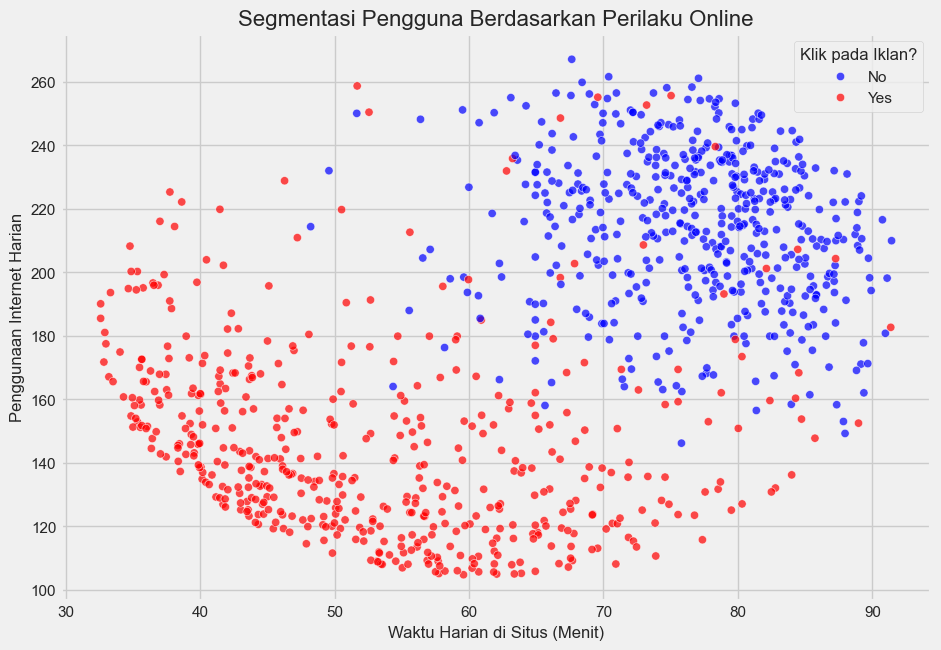

In [31]:
# Membuat scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Daily Time Spent on Site',
    y='Daily Internet Usage',
    hue='Clicked on Ad',
    data=df,
    palette={'No': 'blue', 'Yes': 'red'},
    alpha=0.7
)

# Menambahkan judul dan label
plt.title('Segmentasi Pengguna Berdasarkan Perilaku Online', fontsize=16)
plt.xlabel('Waktu Harian di Situs (Menit)', fontsize=12)
plt.ylabel('Penggunaan Internet Harian', fontsize=12)
plt.legend(title='Klik pada Iklan?')
plt.grid(True)
plt.show()

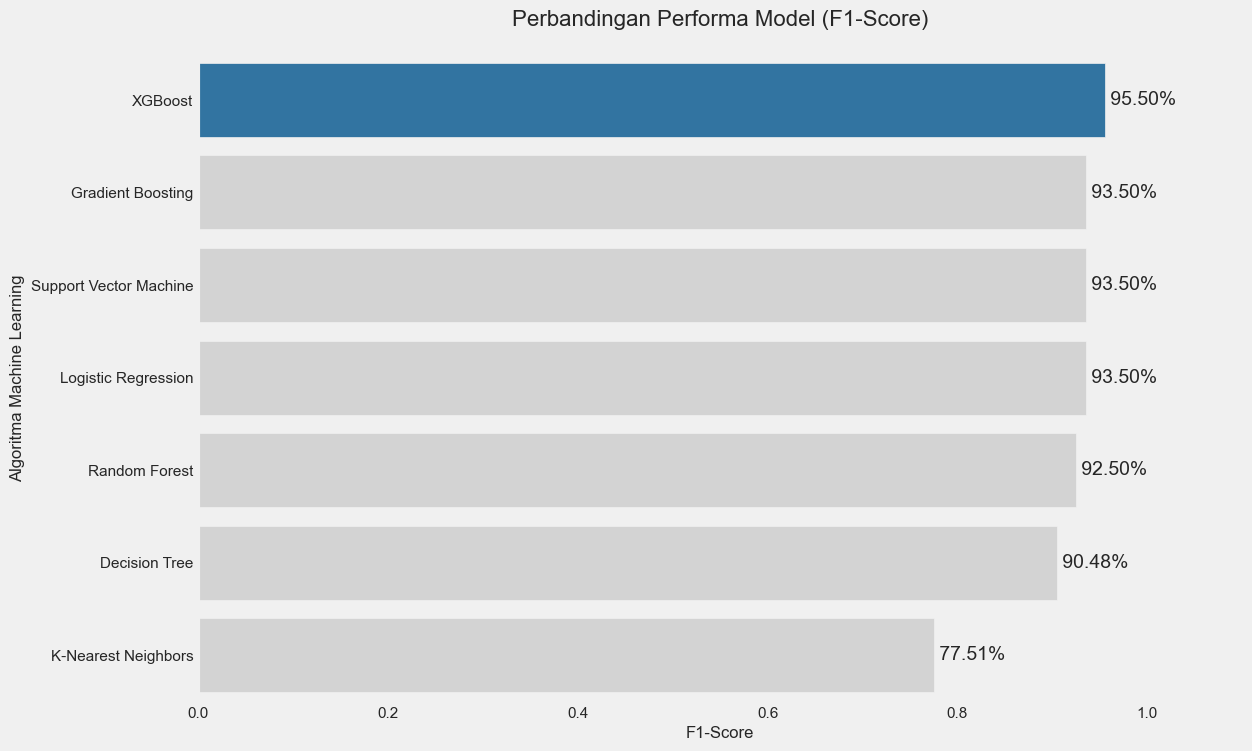

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data F1-Score berdasarkan hasil yang Anda berikan
model_performance = {
    "XGBoost": 0.9550,
    "Gradient Boosting": 0.9350,
    "Support Vector Machine": 0.9350,
    "Logistic Regression": 0.9350,
    "Random Forest": 0.9250,
    "Decision Tree": 0.9048,
    "K-Nearest Neighbors": 0.7751
}

# Membuat DataFrame dari data dan mengurutkannya
f1_df = pd.DataFrame(list(model_performance.items()), columns=['Model', 'F1-Score']).sort_values('F1-Score', ascending=False)

# --- Perubahan Kode Dimulai Di Sini ---

# 1. Membuat palet warna khusus untuk menyorot model terbaik
colors = ['#1f77b4' if model == f1_df.iloc[0]['Model'] else '#D3D3D3' for model in f1_df['Model']] # Hijau untuk terbaik, biru untuk lainnya

# Membuat bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='F1-Score',
    y='Model',
    data=f1_df,
    palette=colors  # Menggunakan palet warna kustom
)

# 2. Menghilangkan gridlines dan spine atas/kanan untuk tampilan lebih bersih
sns.despine()

# --- Akhir Perubahan Kode ---


# Menambahkan label nilai pada setiap batang
for index, value in enumerate(f1_df['F1-Score']):
    plt.text(value, index, f' {value:.2%}', va='center')

# Menambahkan judul dan label
plt.title('Perbandingan Performa Model (F1-Score)', fontsize=16, pad=20)
plt.xlabel('F1-Score', fontsize=12)
plt.ylabel('Algoritma Machine Learning', fontsize=12)
plt.xlim(0, 1.1) # Memberi ruang untuk label
plt.grid(False)
plt.show()

In [51]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Data dari simulasi finansial
# simulation_data = {
#     'Skenario': ['Sebelum Model', 'Sebelum Model', 'Setelah Model', 'Setelah Model'],
#     'Metrik': ['Biaya', 'Laba', 'Biaya', 'Laba'],
#     'Jumlah (Rp)': [1000000, 1500000, 550000, 2100000]
# }
# sim_df = pd.DataFrame(simulation_data)

# # --- Perubahan Kode Dimulai Di Sini ---

# # 1. Membuat figure dengan dua subplot (1 baris, 2 kolom)
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# fig.suptitle('Dampak Finansial: Sebelum vs. Sesudah Model ML', fontsize=18, y=1.02)

# # 2. Grafik Pertama: Perbandingan Laba Bersih
# laba_df = sim_df[sim_df['Metrik'] == 'Laba']
# sns.barplot(
#     x='Skenario',
#     y='Jumlah (Rp)',
#     data=laba_df,
#     palette=['#D3D3D3', '#1f77b4'], # Biru untuk sebelum, Hijau untuk sesudah
#     ax=axes[0]
# )
# axes[0].set_title('Perbandingan Laba Bersih', fontsize=14)
# axes[0].set_ylabel('Jumlah (dalam Rupiah)')
# axes[0].set_xlabel('')

# # 3. Grafik Kedua: Perbandingan Biaya Iklan
# biaya_df = sim_df[sim_df['Metrik'] == 'Biaya']
# sns.barplot(
#     x='Skenario',
#     y='Jumlah (Rp)',
#     data=biaya_df,
#     palette=['#D3D3D3', '#1f77b4'], # Merah untuk sebelum, Oranye untuk sesudah
#     ax=axes[1]
# )
# axes[1].set_title('Perbandingan Biaya Iklan', fontsize=14)
# axes[1].set_ylabel('') # Hapus label y agar tidak redundan
# axes[1].set_xlabel('')

# # --- Akhir Perubahan Kode ---

# # Menambahkan label nilai pada setiap bar di kedua grafik
# for ax in axes:
#     for p in ax.patches:
#         ax.annotate(f'Rp {int(p.get_height()):,}', 
#                     (p.get_x() + p.get_width() / 2., p.get_height()), 
#                     ha='center', va='center', 
#                     xytext=(0, 9), 
#                     textcoords='offset points')
#     ax.ticklabel_format(style='plain', axis='y') # Menonaktifkan notasi ilmiah

# plt.tight_layout(rect=[0, 0, 1, 0.96]) # Atur layout agar suptitle tidak tumpang tindih
# plt.show()

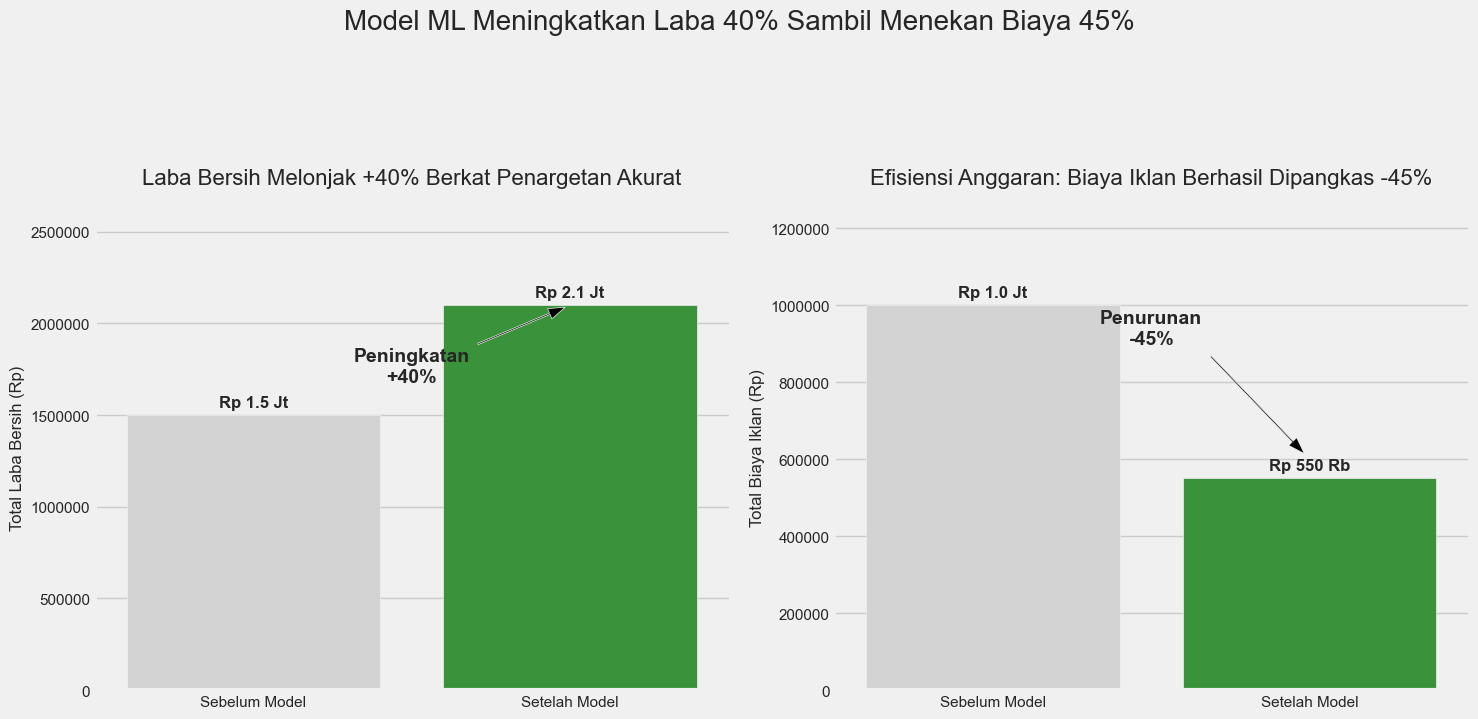

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data dari simulasi finansial, diubah strukturnya agar lebih mudah di-plot
simulation_data = {
    'Skenario': ['Sebelum Model', 'Setelah Model'],
    'Biaya': [1000000, 550000],
    'Laba': [1500000, 2100000]
}
sim_df = pd.DataFrame(simulation_data)

# --- Kode Revisi ---

# Fungsi untuk memformat angka menjadi format Juta (Jt) atau Ribu (Rb)
def format_rupiah(value):
    if value >= 1_000_000:
        return f'Rp {value/1_000_000:.1f} Jt'
    else:
        return f'Rp {value/1_000:.0f} Rb'

# 1. Membuat figure dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Model ML Meningkatkan Laba 40% Sambil Menekan Biaya 45%', fontsize=20, y=1.03)

# 2. Grafik Pertama: Perbandingan Laba Bersih
sns.barplot(
    x='Skenario',
    y='Laba',
    data=sim_df,
    palette=['lightgrey', '#2ca02c'],  # Abu-abu untuk 'Sebelum', Hijau terang untuk 'Sesudah'
    ax=axes[0]
)
axes[0].set_title('Laba Bersih Melonjak +40% Berkat Penargetan Akurat', fontsize=16, pad=15)
axes[0].set_ylabel('Total Laba Bersih (Rp)', fontsize=12)
axes[0].set_xlabel('')
sns.despine(ax=axes[0])

# 3. Grafik Kedua: Perbandingan Biaya Iklan
sns.barplot(
    x='Skenario',
    y='Biaya',
    data=sim_df,
    palette=['lightgrey', '#2ca02c'], # Merah pekat untuk 'Sebelum', Merah terang untuk 'Sesudah'
    ax=axes[1]
)
axes[1].set_title('Efisiensi Anggaran: Biaya Iklan Berhasil Dipangkas -45%', fontsize=16, pad=15)
axes[1].set_ylabel('Total Biaya Iklan (Rp)', fontsize=12)
axes[1].set_xlabel('')
sns.despine(ax=axes[1])

# Menambahkan label nilai yang ringkas pada setiap bar
for ax in axes:
    for p in ax.patches:
        ax.annotate(format_rupiah(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=12,
                    fontweight='bold')
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_ylim(top=ax.get_ylim()[1] * 1.2) # Menambah ruang di atas bar

# Menambahkan panah anotasi untuk menyorot PENINGKATAN LABA
laba_sebelum = sim_df['Laba'][0]
laba_sesudah = sim_df['Laba'][1]
peningkatan_laba = ((laba_sesudah - laba_sebelum) / laba_sebelum)
axes[0].annotate(f'Peningkatan\n+{peningkatan_laba:.0%}',
                 xy=(1, laba_sesudah), xytext=(0.5, laba_sesudah * 0.8),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                 fontsize=14, fontweight='bold', ha='center')

# Menambahkan panah anotasi untuk menyorot PENURUNAN BIAYA
biaya_sebelum = sim_df['Biaya'][0]
biaya_sesudah = sim_df['Biaya'][1]
penurunan_biaya = ((biaya_sebelum - biaya_sesudah) / biaya_sebelum)
axes[1].annotate(f'Penurunan\n-{penurunan_biaya:.0%}',
                 xy=(1, biaya_sesudah + 50000), # Panah menunjuk ke bar 'Setelah'
                 xytext=(0.5, biaya_sebelum * 0.9),    # Teks dimulai dari atas
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                 fontsize=14, fontweight='bold', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

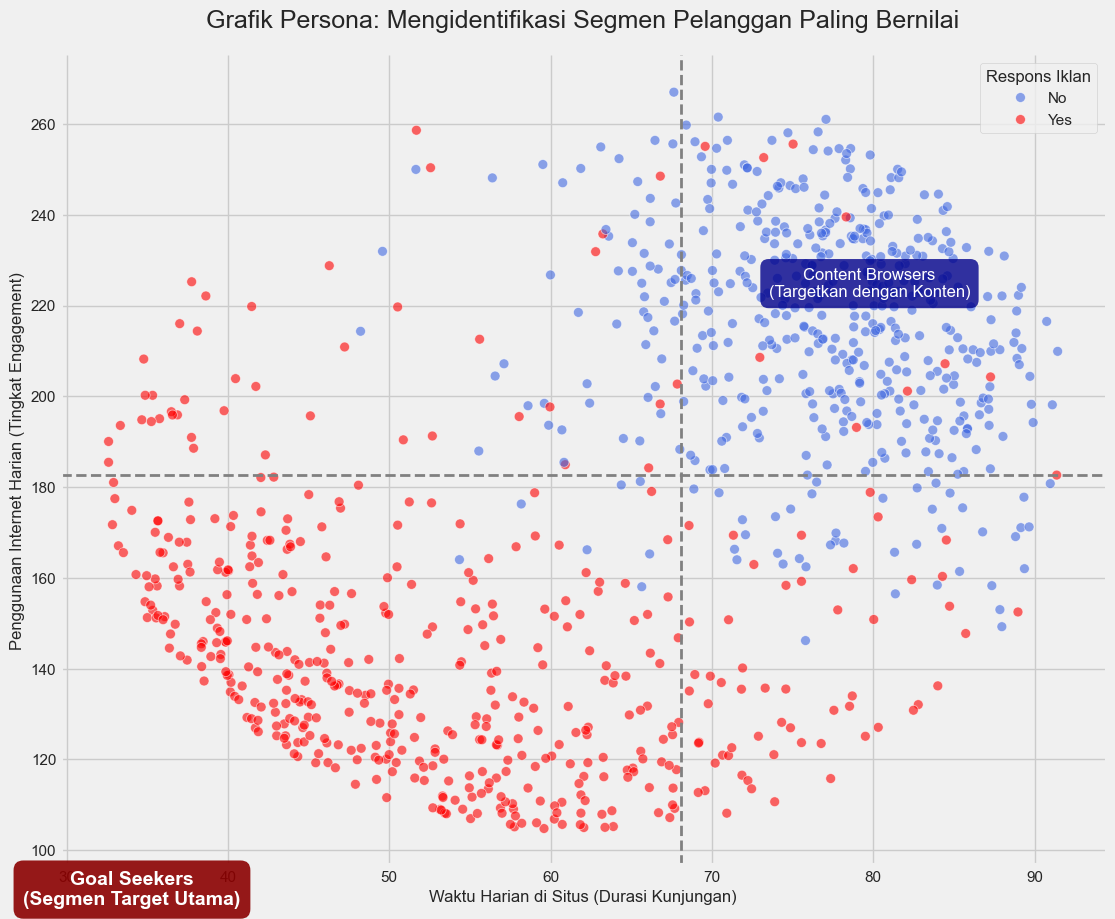

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data dari file
file_path = './Clicked Ads Dataset.csv'
df = pd.read_csv(file_path)

# Membersihkan data untuk visualisasi
df_clean = df.dropna(subset=['Daily Time Spent on Site', 'Daily Internet Usage', 'Clicked on Ad'])

# Menghitung nilai tengah (median) untuk garis pemisah kuadran
median_time_spent = df_clean['Daily Time Spent on Site'].median()
median_internet_usage = df_clean['Daily Internet Usage'].median()

# Membuat scatter plot sebagai dasar
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_clean,
    x='Daily Time Spent on Site',
    y='Daily Internet Usage',
    hue='Clicked on Ad',
    palette={'No': 'royalblue', 'Yes': 'red'},
    alpha=0.6,
    s=50 # Ukuran titik
)

# Menambahkan garis pemisah kuadran
plt.axvline(median_time_spent, color='grey', linestyle='--', linewidth=2)
plt.axhline(median_internet_usage, color='grey', linestyle='--', linewidth=2)

# Menambahkan judul dan label yang jelas
plt.title('Grafik Persona: Mengidentifikasi Segmen Pelanggan Paling Bernilai', fontsize=18, pad=20)
plt.xlabel('Waktu Harian di Situs (Durasi Kunjungan)', fontsize=12)
plt.ylabel('Penggunaan Internet Harian (Tingkat Engagement)', fontsize=12)
plt.legend(title='Respons Iklan')

# Menambahkan label anotasi pada setiap kuadran
plt.text(
    median_time_spent * 0.5, median_internet_usage * 0.5,
    'Goal Seekers\n(Segmen Target Utama)',
    ha='center', va='center', fontsize=14, color='white', weight='bold',
    bbox=dict(boxstyle="round,pad=0.5", fc='darkred', ec='none', alpha=0.9)
)
plt.text(
    (median_time_spent + df_clean['Daily Time Spent on Site'].max()) / 2,
    (median_internet_usage + df_clean['Daily Internet Usage'].max()) / 2,
    'Content Browsers\n(Targetkan dengan Konten)',
    ha='center', va='center', fontsize=12, color='white',
    bbox=dict(boxstyle="round,pad=0.5", fc='darkblue', ec='none', alpha=0.8)
)

# Membersihkan tampilan
sns.despine()
plt.show()

In [56]:
import graphviz
from graphviz import Digraph

# Inisialisasi grafik baru
dot = Digraph(comment='Flowchart Strategi Lama')
dot.attr(rankdir='LR', size='8,5') # LR = Left to Right

# Atribut untuk node (kotak)
dot.attr('node', shape='box', style='rounded,filled', fillcolor='lightblue', fontname='Arial', fontsize='10')

# Atribut untuk panah
dot.attr('edge', fontname='Arial', fontsize='9')

# Membuat node (kotak)
# (Catatan: Graphviz tidak mendukung ikon kompleks secara langsung, jadi kita gunakan label teks)
dot.node('A', '💰\nAnggaran Iklan Besar')
dot.node('B', '👥\nCustomers Tidak Tertarget')
dot.node('C', '📉 ?\nROI Tidak Pasti')

# Membuat panah yang menghubungkan node
dot.edge('A', 'B')
dot.edge('B', 'C')

# Menyimpan dan menampilkan grafik
# (Ini akan menyimpan file 'strategi_lama.gv' dan 'strategi_lama.gv.png' di direktori Anda)
try:
    dot.render('strategi_lama.gv', view=True)
    print("Grafik 'strategi_lama.gv.png' berhasil dibuat.")
except graphviz.backend.execute.ExecutableNotFound:
    print("Error: Graphviz tidak terinstal di sistem Anda.")
    print("Silakan instal dari: https://graphviz.org/download/ dan pastikan path-nya benar.")

Grafik 'strategi_lama.gv.png' berhasil dibuat.
